## Load MNSIT data

In [7]:
# import packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [8]:
# load the raw data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('Training Data: {}'.format(x_train.shape))
print('Training Labels: {}'.format(y_train.shape))
print('Testing Data: {}'.format(x_test.shape))
print('Testing Labels: {}'.format(y_test.shape))

Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


In [9]:
type(x_train)

numpy.ndarray

In [10]:
x_train[0].shape

(28, 28)

### Display the figures

In [11]:
# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
import numpy as np

np.where(x_train == 8)

(array([    3,     3,     4, ..., 59995, 59998, 59998], dtype=int64),
 array([ 8, 21, 12, ..., 13,  3,  4], dtype=int64),
 array([21, 13, 14, ..., 12, 17, 16], dtype=int64))

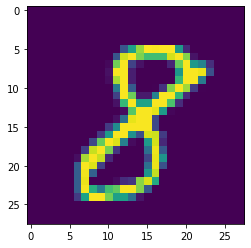

In [13]:
plt.imshow(x_train[59995])

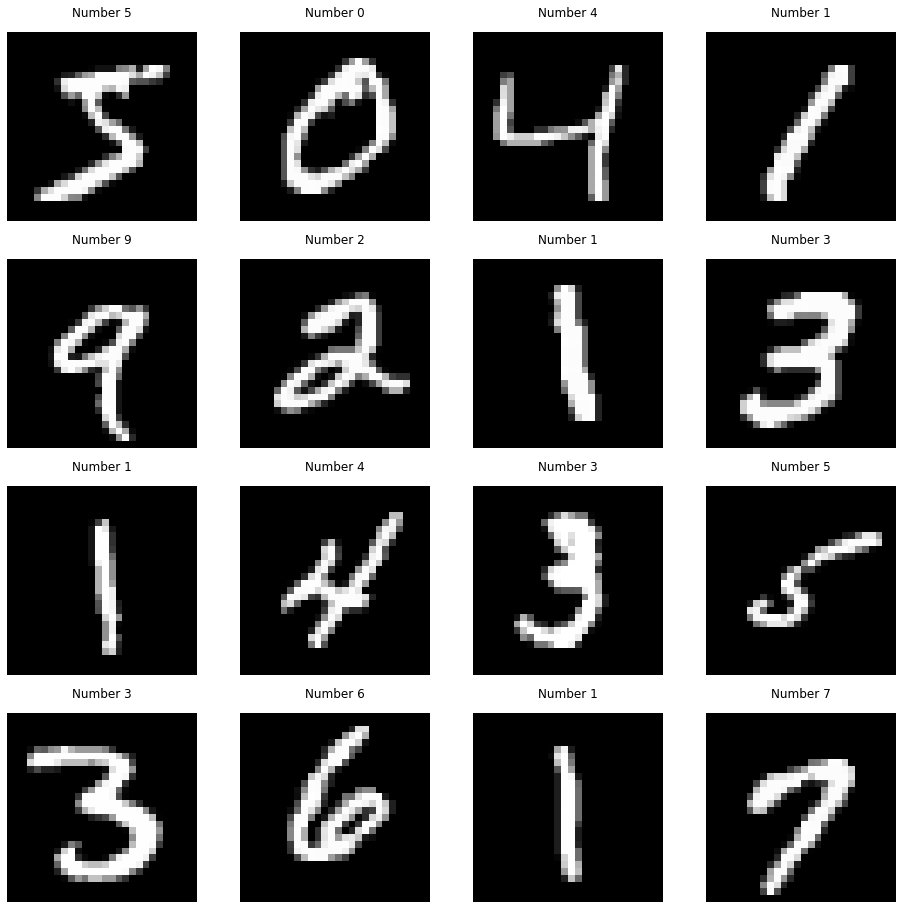

In [14]:
# create figure with 3x3 subplots
fig, axs = plt.subplots(4, 4, figsize = (16, 16))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(x_train[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(y_train[i]))
    
# display the figure
# fig.show()
plt.show()

In [15]:
# check what data format Keras is set up
from tensorflow.keras import backend as K
print(K.image_data_format())

channels_last


In [16]:
# shape it accordingly to 2D images of 28x28x1 pixels instead of a flattened stream of 784 pixels
train_images = x_train.reshape(x_train.shape[0], 28, 28, 1)
test_images = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
    
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
train_images /= 255
test_images /= 255

In [17]:
# convert our train and test labels to be categorical
train_labels = tf.keras.utils.to_categorical(y_train, 10)
test_labels = tf.keras.utils.to_categorical(y_test, 10)

## Create the Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [19]:
print(tf.version.VERSION)
print(tf.keras.__version__)

1.14.0
2.2.4-tf


In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
# 64 3x3 kernels
model.add(Conv2D(64, (3, 3), activation='relu'))
# Reduce by taking the max of each 2x2 block
model.add(MaxPooling2D(pool_size=(2, 2)))
# Dropout to avoid overfitting
model.add(Dropout(0.25))
# Flatten the results to one dimension for passing into our final layer
model.add(Flatten())
# A hidden layer to learn with
model.add(Dense(128, activation='relu'))
# Another dropout
model.add(Dropout(0.5))
# Final categorization from 0-9 with softmax
model.add(Dense(10, activation='softmax'))

W0925 15:35:22.306830 12364 deprecation.py:506] From C:\Users\kim\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels,
                    batch_size=32,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 - 13s - loss: 0.2009 - acc: 0.9394 - val_loss: 0.0673 - val_acc: 0.9789
Epoch 2/10
60000/60000 - 12s - loss: 0.0847 - acc: 0.9752 - val_loss: 0.0424 - val_acc: 0.9862
Epoch 3/10
60000/60000 - 12s - loss: 0.0631 - acc: 0.9813 - val_loss: 0.0304 - val_acc: 0.9901
Epoch 4/10
60000/60000 - 12s - loss: 0.0499 - acc: 0.9847 - val_loss: 0.0264 - val_acc: 0.9913
Epoch 5/10
60000/60000 - 12s - loss: 0.0425 - acc: 0.9873 - val_loss: 0.0299 - val_acc: 0.9910
Epoch 6/10
60000/60000 - 12s - loss: 0.0364 - acc: 0.9888 - val_loss: 0.0277 - val_acc: 0.9914
Epoch 7/10
60000/60000 - 12s - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0283 - val_acc: 0.9914
Epoch 8/10
60000/60000 - 12s - loss: 0.0289 - acc: 0.9905 - val_loss: 0.0296 - val_acc: 0.9921
Epoch 9/10
60000/60000 - 12s - loss: 0.0255 - acc: 0.9919 - val_loss: 0.0342 - val_acc: 0.9918
Epoch 10/10
60000/60000 - 12s - loss: 0.0235 - acc: 0.9923 - val_loss: 0.0282 - val_acc: 0.9912

In [18]:
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.028193840562582888
Test accuracy: 0.9912


## Using SGD Classifier

In [65]:
# preprocessing the images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)
print(Y.shape)

(60000, 784)
(784,)
(60000,)


In [66]:
# convert each image to 1 dimensional array
X_test = x_test.reshape(len(x_test),-1)
Y_test = y_test

# normalize the data to 0 - 1
X_test = X_test.astype(float) / 255.

print(X_test.shape)
print(X_test[0].shape)

(10000, 784)
(784,)


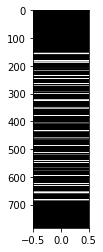

In [47]:
plt.imshow(X[59995].reshape(784,1),cmap='gist_gray',aspect=0.005)

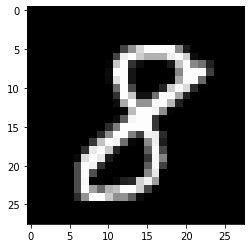

In [48]:
plt.imshow(X[59995].reshape(28,28))

In [49]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state=0)
clf.fit(X,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
clf.predict(X[59995].reshape(1,-1))

array([8], dtype=uint8)

In [51]:
clf.predict(X_test[1000].reshape(1,-1))

array([3], dtype=uint8)

In [52]:
prediction = clf.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('Accuracy score: {}'.format(accuracy_score(Y_test, prediction)))
print(classification_report(Y_test, prediction))
print(confusion_matrix(Y_test, prediction))

Accuracy score: 0.919
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       980
           1       0.98      0.96      0.97      1135
           2       0.92      0.91      0.91      1032
           3       0.92      0.90      0.91      1010
           4       0.90      0.94      0.92       982
           5       0.88      0.87      0.88       892
           6       0.92      0.96      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.87      0.86      0.87       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[ 955    0    2    2    0    4    9    6    1    1]
 [   0 1092    4    4    1    3    6    2   23    0]
 [   7    1  940    9    9    3   16    9   34    4]
 [   2    0   28  913    3   22    3   11   19    9]
 [   1 

### Create a simple linear regression

In [80]:
x = tf.placeholder(tf.float32,shape=[None,784])
# 10 because 0-9 possible numbers
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
# Create the Graph
y = tf.matmul(x,W) + b 

Loss and Optimizer

In [81]:
y_true = tf.placeholder(tf.float32,[None,10])
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_true, logits=y))

In [82]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [83]:
'''
Return a total of `num` random samples and labels. 
'''
def next_batch(num, data, labels):
    
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [84]:
from keras.utils import np_utils

Y_scaled = np_utils.to_categorical(Y)
Y_test_scaled = np_utils.to_categorical(Y_test)

In [85]:
print(Y_scaled.shape)
print(Y_test_scaled.shape)

(60000, 10)
(10000, 10)


### Using Tensorflow Session to run the linear model

In [86]:
init = tf.global_variables_initializer()

In [88]:
with tf.Session() as sess:
    sess.run(init)
    
    # Train the model for 1000 steps on the training set
    for step in range(1000):

        batch_x , batch_y = next_batch(100,X,Y_scaled)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
        
    # Test the Train Model
    matches = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc = tf.reduce_mean(tf.cast(matches,tf.float32))
    
    print('Accuracy: {}'.format(sess.run(acc,feed_dict={x:X_test,y_true:Y_test_scaled})))
    sess.close()

Accuracy: 0.9122999906539917
